In [1]:
import pandas as pd
import numpy as np

from catboost import CatBoostClassifier, Pool
from keras.layers import Dense
from keras.models import Sequential
import keras.optimizers #SGD
import keras.utils #to_categorical

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#1) Book to market
value_book_market = pd.read_csv('6_Portfolios_2x3.csv', skiprows=15, nrows=1138, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_book_market = pd.read_csv('6_Portfolios_2x3.csv', skiprows=1157, nrows=1138, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(value_book_market, equal_book_market)

#2) Cashflow
value_cashflow = pd.read_csv('6_Portfolios_ME_CFP_2x3.csv', skiprows=19, nrows=838, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_cashflow = pd.read_csv('6_Portfolios_ME_CFP_2x3.csv', skiprows=861, nrows=838, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(value_cashflow, equal_cashflow)

#3) Earning
value_earnings = pd.read_csv('6_Portfolios_ME_EP_2x3.csv', skiprows=19, nrows=838, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_earnings = pd.read_csv('6_Portfolios_ME_EP_2x3.csv', skiprows=861, nrows=838, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(value_earning, equal_earning)

#4) Dividend
value_dividend = pd.read_csv('6_Portfolios_ME_DP_2x3.csv', skiprows=19, nrows=1126, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_dividend = pd.read_csv('6_Portfolios_ME_DP_2x3.csv', skiprows=1149, nrows=1126, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(value_dividend, equal_dividend)

#5) Investment
value_investment = pd.read_csv('6_Portfolios_ME_INV_2x3.csv', skiprows=16, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_investment = pd.read_csv('6_Portfolios_ME_INV_2x3.csv', skiprows=714, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(value_investment, equal_investment)

#6) Profitability
value_profitability = pd.read_csv('6_Portfolios_ME_OP_2x3.csv', skiprows=22, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_profitability = pd.read_csv('6_Portfolios_ME_OP_2x3.csv', skiprows=720, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(value_profit, equal_profit)

#7) Prior 1 month return
value_prior1m = pd.read_csv('6_Portfolios_ME_Prior_1_0.csv', skiprows=11, nrows=1143, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_prior1m = pd.read_csv('6_Portfolios_ME_Prior_1_0.csv', skiprows=1158, nrows=1143, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(value_prior1m, equal_prior1m)

#8) 12-1 Price momentum
value_momentum = pd.read_csv('6_Portfolios_ME_Prior_12_2.csv', skiprows=11, nrows=1132, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_momentum = pd.read_csv('6_Portfolios_ME_Prior_12_2.csv', skiprows=1147, nrows=1132, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(value_momentum, equal_momentum)

#9) Long term reversal
value_reversal = pd.read_csv('6_Portfolios_ME_Prior_60_13.csv', skiprows=11, nrows=1084, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_reversal = pd.read_csv('6_Portfolios_ME_Prior_60_13.csv', skiprows=1099, nrows=1084, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(value_reversal, equal_reversal)

# ********* 5*5  ***********
#10) Accruals
value_accruals = pd.read_csv('25_Portfolios_ME_AC_5x5.csv', skiprows=18, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_accruals = pd.read_csv('25_Portfolios_ME_AC_5x5.csv', skiprows=716, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(value_accruals, equal_accruals)

#11) Issuance
value_issuance = pd.read_csv('25_Portfolios_ME_NI_5x5.csv', skiprows=18, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_issuance = pd.read_csv('25_Portfolios_ME_NI_5x5.csv', skiprows=716, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(value_issuance, equal_issuance)

#12) Beta
value_beta = pd.read_csv('25_Portfolios_ME_BETA_5x5.csv', skiprows=16, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_beta = pd.read_csv('25_Portfolios_ME_BETA_5x5.csv', skiprows=714, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(value_beta, equal_beta)

#13) Volatility
value_vol = abs(pd.read_csv('25_Portfolios_ME_VAR_5x5.csv', skiprows=19, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m')))
equal_vol = abs(pd.read_csv('25_Portfolios_ME_VAR_5x5.csv', skiprows=717, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m')))
# display(value_var, equal_var)

#14) Residual Volatility
value_resvol = np.sqrt(abs(pd.read_csv('25_Portfolios_ME_RESVAR_5x5.csv', skiprows=19, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))))
equal_resvol = np.sqrt(abs(pd.read_csv('25_Portfolios_ME_RESVAR_5x5.csv', skiprows=717, nrows=694, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))))
# display(value_resvar, equal_resvar)

#15) Fama French
fama_french =  pd.read_csv('F-F_Research_Data_Factors.csv', skiprows=3, nrows=1138, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
# display(fama_french)

<p><b>Part 1)</b> Determine economic cycle by using CPI</p>

In [3]:
economic_cycle = pd.read_excel('CPI US.xls', sheet_name = 'Sheet1')
economic_cycle['Dates'] = pd.to_datetime(economic_cycle['Dates'])
economic_cycle = economic_cycle.loc[(economic_cycle['Dates'].astype('str') > '2018-04-01') & (economic_cycle['Dates'].astype('str') < '2021-05-01')]
economic_cycle

,Dates,United States of America - CPI (Y-o-Y %) (Monthly)
1252,2018-05-01,2.801012
1253,2018-06-01,2.871548
1254,2018-07-01,2.949515
1255,2018-08-01,2.699180
1256,2018-09-01,2.276972
1257,2018-10-01,2.522470
1258,2018-11-01,2.176601
1259,2018-12-01,1.910159
1260,2019-01-01,1.551235
1261,2019-02-01,1.520135


In [4]:
economic_cycle['gradient'] = np.gradient(np.array(economic_cycle['United States of America - CPI (Y-o-Y %) (Monthly)']))
economic_cycle = economic_cycle.reset_index().drop('index', axis=1)
economic_cycle['rate of change'] = np.gradient(np.array(economic_cycle['gradient']))
economic_cycle

,Dates,United States of America - CPI (Y-o-Y %) (Monthly),gradient,rate of change
0,2018-05-01,2.801012,0.070536,0.003715
1,2018-06-01,2.871548,0.074251,-0.078360
2,2018-07-01,2.949515,-0.086184,-0.205261
3,2018-08-01,2.699180,-0.336271,-0.001085
4,2018-09-01,2.276972,-0.088355,0.143043
5,2018-10-01,2.522470,-0.050186,-0.108900
6,2018-11-01,2.176601,-0.306156,-0.131249
7,2018-12-01,1.910159,-0.312683,0.055572
8,2019-01-01,1.551235,-0.195012,0.234163
9,2019-02-01,1.520135,0.155644,0.216582


In [5]:
economic_cycle['gradient +/-'] = ['positive' if x >= 0 else 'negative' for x in economic_cycle['gradient']]
economic_cycle['rate of change +/-'] = ['positive' if x >= 0 else 'negative' for x in economic_cycle['rate of change']]
economic_cycle

,Dates,United States of America - CPI (Y-o-Y %) (Monthly),gradient,rate of change,gradient +/-,rate of change +/-
0,2018-05-01,2.801012,0.070536,0.003715,positive,positive
1,2018-06-01,2.871548,0.074251,-0.078360,positive,negative
2,2018-07-01,2.949515,-0.086184,-0.205261,negative,negative
3,2018-08-01,2.699180,-0.336271,-0.001085,negative,negative
4,2018-09-01,2.276972,-0.088355,0.143043,negative,positive
5,2018-10-01,2.522470,-0.050186,-0.108900,negative,negative
6,2018-11-01,2.176601,-0.306156,-0.131249,negative,negative
7,2018-12-01,1.910159,-0.312683,0.055572,negative,positive
8,2019-01-01,1.551235,-0.195012,0.234163,negative,positive
9,2019-02-01,1.520135,0.155644,0.216582,positive,positive


In [6]:
def macro_mapper(i):
    if economic_cycle['gradient +/-'][i] == 'negative' and economic_cycle['rate of change +/-'][i] == 'negative':
        state = 'contraction'
        
    elif economic_cycle['gradient +/-'][i] == 'negative' and economic_cycle['rate of change +/-'][i] == 'positive':
        state = 'recovery'
        
    elif economic_cycle['gradient +/-'][i] == 'positive' and economic_cycle['rate of change +/-'][i] == 'negative':
        state = 'slowdown'
        
    elif economic_cycle['gradient +/-'][i] == 'positive' and economic_cycle['rate of change +/-'][i] == 'positive':
        state = 'expansion'
        
    else:
        pass
    
    return state

<p>Identified the four cycles of the macro state within the economy:</p> 
<p>1.Expansion</p>
<p>2.Recovery</p>
<p>3.Slowdown</p>
<p>4.Contraction</p>

In [7]:
economic_cycle['macro state'] = [macro_mapper(i) for i in range(len(economic_cycle.Dates))]
economic_cycle = economic_cycle.set_index(economic_cycle.Dates)
economic_cycle = economic_cycle.drop('Dates', axis = 1)
economic_cycle

,United States of America - CPI (Y-o-Y %) (Monthly),gradient,rate of change,gradient +/-,rate of change +/-,macro state
Dates,,,,,,
2018-05-01,2.801012,0.070536,0.003715,positive,positive,expansion
2018-06-01,2.871548,0.074251,-0.078360,positive,negative,slowdown
2018-07-01,2.949515,-0.086184,-0.205261,negative,negative,contraction
2018-08-01,2.699180,-0.336271,-0.001085,negative,negative,contraction
2018-09-01,2.276972,-0.088355,0.143043,negative,positive,recovery
2018-10-01,2.522470,-0.050186,-0.108900,negative,negative,contraction
2018-11-01,2.176601,-0.306156,-0.131249,negative,negative,contraction
2018-12-01,1.910159,-0.312683,0.055572,negative,positive,recovery
2019-01-01,1.551235,-0.195012,0.234163,negative,positive,recovery


In [8]:
hilo_title_list_2x3 = ['Book To Market', 'Cashflow To Price',
                  'Earnings Yield', 'Dividend Yield', 'Profitability', '12-1 price momentum', 'Volatility']

hilo_value_list_2x3 = [value_book_market, value_cashflow, value_earnings,
                 value_dividend, value_profitability, value_momentum, value_vol]

for i in range(len(hilo_title_list_2x3)):
    hilo_value_list_2x3[i]['Big Cap'] = ((hilo_value_list_2x3[i].iloc[:,5] - hilo_value_list_2x3[i].iloc[:,3]))
    hilo_value_list_2x3[i]['Small Cap'] = ((hilo_value_list_2x3[i].iloc[:,2] - hilo_value_list_2x3[i].iloc[:,0]))
    


___

In [9]:
HML_BookMarket_BigCap = pd.DataFrame(hilo_value_list_2x3[0]['Big Cap'].loc['2018-05-01':'2021-04-01'], columns=['Big Cap'])
HML_CashFlow_BigCap = pd.DataFrame(hilo_value_list_2x3[1]['Big Cap'].loc['2018-05-01':'2021-04-01'], columns=['Big Cap'])
HML_Earnings_BigCap = pd.DataFrame(hilo_value_list_2x3[2]['Big Cap'].loc['2018-05-01':'2021-04-01'], columns=['Big Cap'])
HML_Dividend_BigCap = pd.DataFrame(hilo_value_list_2x3[3]['Big Cap'].loc['2018-05-01':'2021-04-01'], columns=['Big Cap'])
HML_Profitability_BigCap = pd.DataFrame(hilo_value_list_2x3[4]['Big Cap'].loc['2018-05-01':'2021-04-01'], columns=['Big Cap'])
HML_Momentum_BigCap = pd.DataFrame(hilo_value_list_2x3[5]['Big Cap'].loc['2018-05-01':'2021-04-01'], columns=['Big Cap'])
HML_Volatility_BigCap = pd.DataFrame(hilo_value_list_2x3[6]['Big Cap'].loc['2018-05-01':'2021-04-01'], columns=['Big Cap'])

In [10]:
HML_BookMarket_SmallCap = pd.DataFrame(hilo_value_list_2x3[0]['Small Cap'].loc['2018-05-01':'2021-04-01'], columns=['Small Cap'])
HML_CashFlow_SmallCap = pd.DataFrame(hilo_value_list_2x3[1]['Small Cap'].loc['2018-05-01':'2021-04-01'], columns=['Small Cap'])
HML_Earnings_SmallCap = pd.DataFrame(hilo_value_list_2x3[2]['Small Cap'].loc['2018-05-01':'2021-04-01'], columns=['Small Cap'])
HML_Dividend_SmallCap = pd.DataFrame(hilo_value_list_2x3[3]['Small Cap'].loc['2018-05-01':'2021-04-01'], columns=['Small Cap'])
HML_Profitability_SmallCap = pd.DataFrame(hilo_value_list_2x3[4]['Small Cap'].loc['2018-05-01':'2021-04-01'], columns=['Small Cap'])
HML_Momentum_SmallCap = pd.DataFrame(hilo_value_list_2x3[5]['Small Cap'].loc['2018-05-01':'2021-04-01'], columns=['Small Cap'])
HML_Volatility_SmallCap = pd.DataFrame(hilo_value_list_2x3[6]['Small Cap'].loc['2018-05-01':'2021-04-01'], columns=['Small Cap'])

<p>Next, we produce the 6 factors for the past 3 years (1st May 2018 - 1st April 2021), combination of three of these factors will be mapped to each of the four macro states(expansion,recovery,contraction,slowdown):</p>
<p>1.Value</p>
<p>2.Size</p>
<p>3.Yield</p>
<p>4.Momentum</p>
<p>5.Quality</p>
<p>6.Volatility</p>

#### 1) value

In [11]:
value_HML = pd.concat([HML_BookMarket_BigCap, HML_CashFlow_BigCap, 
                       HML_BookMarket_SmallCap, HML_CashFlow_SmallCap], axis = 1)


value_HML['mean'] = value_HML.mean(axis=1)
value_HML = value_HML.rename(columns = {'mean':'value'})
value_HML

,Big Cap,Big Cap,Small Cap,Small Cap,value
2018-05-01,-4.2073,-1.68,-2.0987,-1.63,-2.404000
2018-06-01,-2.3570,-1.45,-2.2722,1.93,-1.037300
2018-07-01,1.3954,0.14,-0.2592,-0.75,0.131550
2018-08-01,-4.5295,-3.07,-3.3051,-3.01,-3.478650
2018-09-01,-2.3611,-0.93,-0.9062,0.11,-1.021825
2018-10-01,2.6446,4.90,4.2740,2.36,3.544650
2018-11-01,0.8006,-0.93,-0.1209,-1.51,-0.440075
2018-12-01,-3.3106,-3.06,-0.4724,0.19,-1.663250
2019-01-01,0.9685,1.21,-1.8893,1.08,0.342300
2019-02-01,-2.5627,-1.56,-2.8565,-2.74,-2.429800


#### 2) Size (small minus big):

In [12]:
value_HML_BigCap = pd.concat([HML_BookMarket_BigCap, HML_CashFlow_BigCap, HML_Earnings_BigCap], axis = 1)
value_HML_BigCap['mean'] = value_HML_BigCap.mean(axis=1)
value_HML_BigCap

,Big Cap,Big Cap,Big Cap,mean
2018-05-01,-4.2073,-1.68,-2.09,-2.659100
2018-06-01,-2.3570,-1.45,-1.89,-1.899000
2018-07-01,1.3954,0.14,0.86,0.798467
2018-08-01,-4.5295,-3.07,-2.28,-3.293167
2018-09-01,-2.3611,-0.93,-1.70,-1.663700
2018-10-01,2.6446,4.90,5.93,4.491533
2018-11-01,0.8006,-0.93,-0.77,-0.299800
2018-12-01,-3.3106,-3.06,-2.26,-2.876867
2019-01-01,0.9685,1.21,0.12,0.766167
2019-02-01,-2.5627,-1.56,-2.53,-2.217567


In [13]:
value_HML_SmallCap = pd.concat([HML_BookMarket_SmallCap, HML_CashFlow_SmallCap, HML_Earnings_SmallCap], axis = 1)
value_HML_SmallCap['mean'] = value_HML_SmallCap.mean(axis=1)
value_HML_SmallCap

,Small Cap,Small Cap,Small Cap,mean
2018-05-01,-2.0987,-1.63,-1.02,-1.582900
2018-06-01,-2.2722,1.93,1.12,0.259267
2018-07-01,-0.2592,-0.75,-1.49,-0.833067
2018-08-01,-3.3051,-3.01,-2.89,-3.068367
2018-09-01,-0.9062,0.11,-1.07,-0.622067
2018-10-01,4.2740,2.36,1.64,2.758000
2018-11-01,-0.1209,-1.51,-1.14,-0.923633
2018-12-01,-0.4724,0.19,-0.12,-0.134133
2019-01-01,-1.8893,1.08,1.75,0.313567
2019-02-01,-2.8565,-2.74,-1.81,-2.468833


In [14]:
Size = pd.DataFrame(value_HML_SmallCap['mean'].sub(value_HML_BigCap['mean']))
Size = Size.rename(columns = {'mean':'size'})
Size

,size
2018-05-01,1.076200
2018-06-01,2.158267
2018-07-01,-1.631533
2018-08-01,0.224800
2018-09-01,1.041633
2018-10-01,-1.733533
2018-11-01,-0.623833
2018-12-01,2.742733
2019-01-01,-0.452600
2019-02-01,-0.251267


#### 3) Yield:

In [15]:
yield_HML = pd.concat([HML_Earnings_BigCap, HML_Dividend_BigCap, HML_Earnings_SmallCap, HML_Dividend_SmallCap], axis = 1)
yield_HML['mean'] = yield_HML.mean(axis=1)
yield_HML = yield_HML.rename(columns = {'mean':'yield'})
yield_HML

,Big Cap,Big Cap,Small Cap,Small Cap,yield
2018-05-01,-2.09,0.44,-1.02,0.11,-0.6400
2018-06-01,-1.89,0.68,1.12,0.62,0.1325
2018-07-01,0.86,1.26,-1.49,-0.16,0.1175
2018-08-01,-2.28,-1.91,-2.89,-1.94,-2.2550
2018-09-01,-1.70,-0.10,-1.07,0.76,-0.5275
2018-10-01,5.93,5.32,1.64,3.44,4.0825
2018-11-01,-0.77,2.52,-1.14,0.78,0.3475
2018-12-01,-2.26,1.13,-0.12,1.39,0.0350
2019-01-01,0.12,-3.30,1.75,-1.01,-0.6100
2019-02-01,-2.53,-1.56,-1.81,-1.35,-1.8125


#### 4) momentum:

In [16]:
HML_Momentum = pd.concat([HML_Momentum_BigCap, HML_Momentum_SmallCap], axis = 1)
HML_Momentum['mean'] = HML_Momentum.mean(axis=1)
HML_Momentum = HML_Momentum.rename(columns = {'mean':'momentum'})
HML_Momentum

,Big Cap,Small Cap,momentum
2018-05-01,4.32,3.28,3.800
2018-06-01,-3.16,-1.60,-2.380
2018-07-01,-3.06,-0.28,-1.670
2018-08-01,6.90,3.55,5.225
2018-09-01,0.35,-0.45,-0.050
2018-10-01,-3.43,-0.25,-1.840
2018-11-01,-1.05,-1.60,-1.325
2018-12-01,0.79,2.91,1.850
2019-01-01,-8.62,-8.68,-8.650
2019-02-01,1.20,0.52,0.860


#### 5) Quality

In [17]:
HML_Profitability = pd.concat([HML_Profitability_BigCap, HML_Profitability_SmallCap], axis = 1)
HML_Profitability['mean'] = HML_Profitability.mean(axis=1)
HML_Profitability = HML_Profitability.rename(columns = {'mean':'quality'})
HML_Profitability

,Big Cap,Small Cap,quality
2018-05-01,0.5826,-4.6069,-2.01215
2018-06-01,-0.0874,1.7403,0.82645
2018-07-01,2.1308,0.9371,1.53395
2018-08-01,2.4724,-2.7653,-0.14645
2018-09-01,1.2946,-0.1214,0.58660
2018-10-01,1.0079,0.8142,0.91105
2018-11-01,-0.2162,-1.0515,-0.63385
2018-12-01,1.0511,-1.2267,-0.08780
2019-01-01,-2.8021,1.5028,-0.64965
2019-02-01,1.2503,-1.0743,0.08800


#### 6) Volatility

In [18]:
HML_Volatility = pd.concat([HML_Volatility_BigCap, HML_Volatility_SmallCap], axis = 1)
HML_Volatility['mean'] = HML_Volatility.mean(axis=1)
HML_Volatility = HML_Volatility.rename(columns = {'mean':'volatility'})
HML_Volatility

,Big Cap,Small Cap,volatility
2018-05-01,-0.038347,0.958855,0.460254
2018-06-01,-0.098406,-0.396973,-0.247689
2018-07-01,0.875923,1.001284,0.938603
2018-08-01,-0.626852,1.350700,0.361924
2018-09-01,0.091282,0.361451,0.226367
2018-10-01,-0.857637,0.660360,-0.098638
2018-11-01,-0.156406,0.120408,-0.017999
2018-12-01,-0.983554,0.774876,-0.104339
2019-01-01,-0.835396,1.338220,0.251412
2019-02-01,-0.224614,0.256200,0.015793


___

<p>Factor mapper:</p>

In [19]:
def Factor_mapper(date):

    if economic_cycle.loc[date][-1] == 'recovery':
        return value_HML.loc[date][-1] + Size.loc[date][-1] + yield_HML.loc[date][-1]
    
    elif economic_cycle.loc[date][-1] == 'expansion':
        return HML_Momentum.loc[date][-1] + Size.loc[date][-1] + value_HML.loc[date][-1]
    
    elif economic_cycle.loc[date][-1] == 'slowdown':
        return HML_Momentum.loc[date][-1] + HML_Profitability.loc[date][-1] + HML_Volatility.loc[date][-1]
    
    elif economic_cycle.loc[date][-1] == 'contraction':
        return HML_Volatility.loc[date][-1] + HML_Profitability.loc[date][-1] + value_HML.loc[date][-1]
    else:
        pass

In [20]:
economic_cycle['performance'] = [Factor_mapper(i) for i in list(economic_cycle.index.astype('str'))]
economic_cycle

,United States of America - CPI (Y-o-Y %) (Monthly),gradient,rate of change,gradient +/-,rate of change +/-,macro state,performance
Dates,,,,,,,
2018-05-01,2.801012,0.070536,0.003715,positive,positive,expansion,2.472200
2018-06-01,2.871548,0.074251,-0.078360,positive,negative,slowdown,-1.801239
2018-07-01,2.949515,-0.086184,-0.205261,negative,negative,contraction,2.604103
2018-08-01,2.699180,-0.336271,-0.001085,negative,negative,contraction,-3.263176
2018-09-01,2.276972,-0.088355,0.143043,negative,positive,recovery,-0.507692
2018-10-01,2.522470,-0.050186,-0.108900,negative,negative,contraction,4.357062
2018-11-01,2.176601,-0.306156,-0.131249,negative,negative,contraction,-1.091924
2018-12-01,1.910159,-0.312683,0.055572,negative,positive,recovery,1.114483
2019-01-01,1.551235,-0.195012,0.234163,negative,positive,recovery,-0.720300


<AxesSubplot:ylabel='performance'>

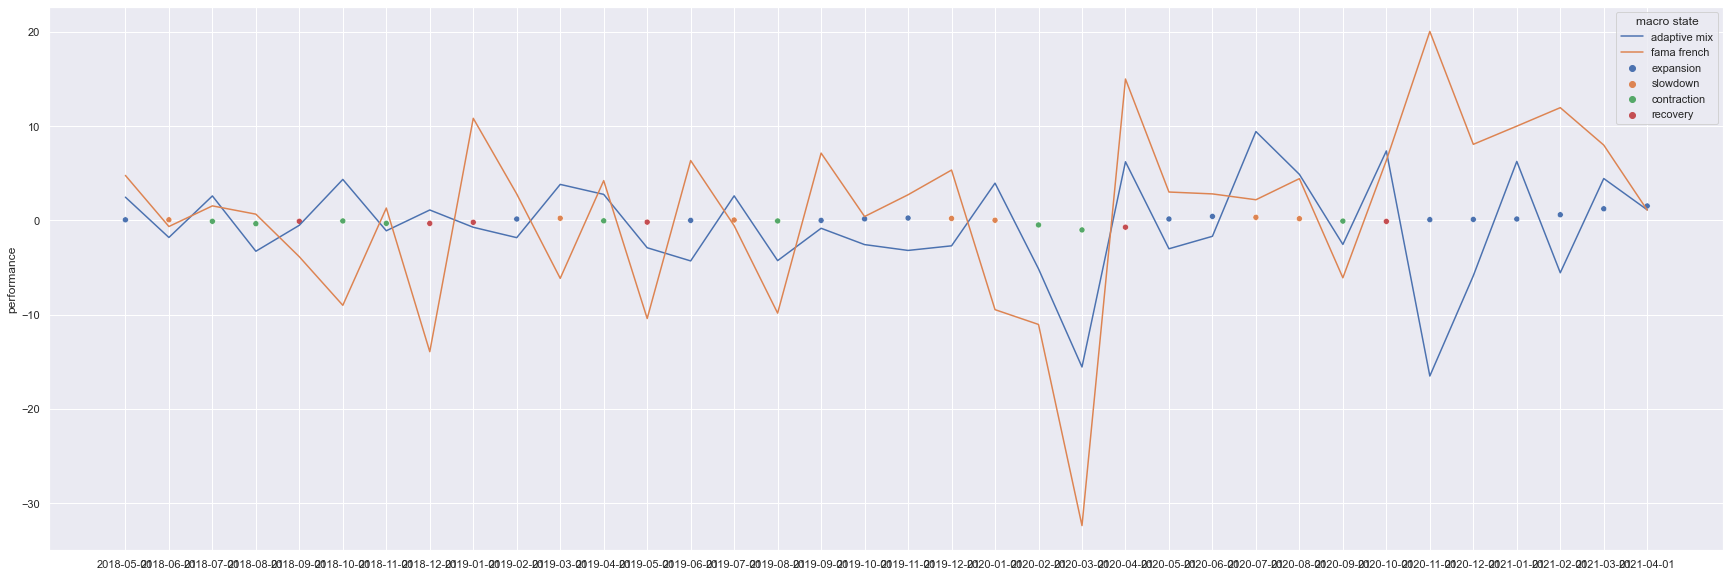

In [21]:
sns.set(rc={'figure.figsize':(30,10)})

sns.lineplot(x = list(economic_cycle.index.astype('str')), y='performance', data = economic_cycle, label = 'adaptive mix')
sns.lineplot(x = list(fama_french.loc['2018-05-01':].index.astype('str')), y = fama_french[['Mkt-RF', 'SMB', 'HML']].sum(axis=1).loc['2018-05-01':], data = fama_french.loc['2018-05-01':], label = 'fama french')
#sns.lineplot(x = list(value_HML.index.astype('str')), y = 'mean', data = value_HML, label = 'value')

sns.scatterplot(x = list(economic_cycle.index.astype('str')), y='gradient', hue='macro state', data = economic_cycle)

<p><u>Findings</u></p>
<p>Our assumption that the following combination did not outperform Fama French 3-factor model:</p>
<p>Recovery state - Value, Size, Yield</p>
<p>Expansion state - Momentum, Size, Value</p>
<p>Slowdown state - Momentum, Quality, Low Vol</p>
<p>Contraction state - Low Vol, Quality, Value</p>
<p>We therefore have to seek new combinations of the top 3 factors for each phase of the economy, this will be our new adaptive mix portfolio.</p>

___

<p><b><u>Part 2</u></b> - Seeking the returns for the past 55 years (1963 to 2018) to determine the best factors for each of the economic states:</p>

In [22]:
economic_cycle_1 = pd.read_excel('CPI US.xls', sheet_name = 'Sheet1')
economic_cycle_1['Dates'] = pd.to_datetime(economic_cycle_1['Dates'])
economic_cycle_1 = economic_cycle_1.set_index('Dates')
economic_cycle_1 = economic_cycle_1.loc['1963-07-01':'2018-05-01']
economic_cycle_1

,United States of America - CPI (Y-o-Y %) (Monthly)
Dates,
1963-07-01,1.320132
1963-08-01,1.320132
1963-09-01,0.986842
1963-10-01,1.315789
1963-11-01,1.315789
...,...
2018-01-01,2.070508
2018-02-01,2.211795
2018-03-01,2.359711


In [23]:
HML_BookMarket_BigCap_1 = pd.DataFrame(hilo_value_list_2x3[0]['Big Cap'].loc['1963-07-01':'2018-05-01'], columns=['Big Cap'])
HML_CashFlow_BigCap_1 = pd.DataFrame(hilo_value_list_2x3[1]['Big Cap'].loc['1963-07-01':'2018-05-01'], columns=['Big Cap'])
HML_Earnings_BigCap_1 = pd.DataFrame(hilo_value_list_2x3[2]['Big Cap'].loc['1963-07-01':'2018-05-01'], columns=['Big Cap'])
HML_Dividend_BigCap_1 = pd.DataFrame(hilo_value_list_2x3[3]['Big Cap'].loc['1963-07-01':'2018-05-01'], columns=['Big Cap'])
HML_Profitability_BigCap_1 = pd.DataFrame(hilo_value_list_2x3[4]['Big Cap'].loc['1963-07-01':'2018-05-01'], columns=['Big Cap'])
HML_Momentum_BigCap_1 = pd.DataFrame(hilo_value_list_2x3[5]['Big Cap'].loc['1963-07-01':'2018-05-01'], columns=['Big Cap'])
HML_Volatility_BigCap_1 = pd.DataFrame(hilo_value_list_2x3[6]['Big Cap'].loc['1963-07-01':'2018-05-01'], columns=['Big Cap'])

HML_BookMarket_SmallCap_1 = pd.DataFrame(hilo_value_list_2x3[0]['Small Cap'].loc['1963-07-01':'2018-05-01'], columns=['Small Cap'])
HML_CashFlow_SmallCap_1 = pd.DataFrame(hilo_value_list_2x3[1]['Small Cap'].loc['1963-07-01':'2018-05-01'], columns=['Small Cap'])
HML_Earnings_SmallCap_1 = pd.DataFrame(hilo_value_list_2x3[2]['Small Cap'].loc['1963-07-01':'2018-05-01'], columns=['Small Cap'])
HML_Dividend_SmallCap_1 = pd.DataFrame(hilo_value_list_2x3[3]['Small Cap'].loc['1963-07-01':'2018-05-01'], columns=['Small Cap'])
HML_Profitability_SmallCap_1 = pd.DataFrame(hilo_value_list_2x3[4]['Small Cap'].loc['1963-07-01':'2018-05-01'], columns=['Small Cap'])
HML_Momentum_SmallCap_1 = pd.DataFrame(hilo_value_list_2x3[5]['Small Cap'].loc['1963-07-01':'2018-05-01'], columns=['Small Cap'])
HML_Volatility_SmallCap_1 = pd.DataFrame(hilo_value_list_2x3[6]['Small Cap'].loc['1963-07-01':'2018-05-01'], columns=['Small Cap'])

In [24]:
economic_cycle_1['gradient'] = np.gradient(np.array(economic_cycle_1['United States of America - CPI (Y-o-Y %) (Monthly)']))
economic_cycle_1['rate of change'] = np.gradient(np.array(economic_cycle_1['gradient']))

economic_cycle_1['gradient +/-'] = ['positive' if x >= 0 else 'negative' for x in economic_cycle_1['gradient']]
economic_cycle_1['rate of change +/-'] = ['positive' if x >= 0 else 'negative' for x in economic_cycle_1['rate of change']]

economic_cycle_1

,United States of America - CPI (Y-o-Y %) (Monthly),gradient,rate of change,gradient +/-,rate of change +/-
Dates,,,,,
1963-07-01,1.320132,0.000000,-1.666450e-01,positive,negative
1963-08-01,1.320132,-0.166645,-1.085750e-03,negative,negative
1963-09-01,0.986842,-0.002171,1.655593e-01,negative,positive
1963-10-01,1.315789,0.164474,8.332275e-02,positive,positive
1963-11-01,1.315789,0.164474,2.500000e-07,positive,positive
...,...,...,...,...,...
2018-01-01,2.070508,0.051357,1.053195e-01,positive,positive
2018-02-01,2.211795,0.144602,3.705900e-02,positive,positive
2018-03-01,2.359711,0.125474,3.802450e-02,positive,positive


In [25]:
def macro_mapper_1(i):
    if economic_cycle_1['gradient +/-'][i] == 'negative' and economic_cycle_1['rate of change +/-'][i] == 'negative':
        state = 'contraction'
        
    elif economic_cycle_1['gradient +/-'][i] == 'negative' and economic_cycle_1['rate of change +/-'][i] == 'positive':
        state = 'recovery'
        
    elif economic_cycle_1['gradient +/-'][i] == 'positive' and economic_cycle_1['rate of change +/-'][i] == 'negative':
        state = 'slowdown'
        
    elif economic_cycle_1['gradient +/-'][i] == 'positive' and economic_cycle_1['rate of change +/-'][i] == 'positive':
        state = 'expansion'
        
    else:
        pass
    
    return state

In [26]:
economic_cycle_1['macro state'] = [macro_mapper_1(i) for i in range(len(economic_cycle_1['gradient']))]
economic_cycle_1

,United States of America - CPI (Y-o-Y %) (Monthly),gradient,rate of change,gradient +/-,rate of change +/-,macro state
Dates,,,,,,
1963-07-01,1.320132,0.000000,-1.666450e-01,positive,negative,slowdown
1963-08-01,1.320132,-0.166645,-1.085750e-03,negative,negative,contraction
1963-09-01,0.986842,-0.002171,1.655593e-01,negative,positive,recovery
1963-10-01,1.315789,0.164474,8.332275e-02,positive,positive,expansion
1963-11-01,1.315789,0.164474,2.500000e-07,positive,positive,expansion
...,...,...,...,...,...,...
2018-01-01,2.070508,0.051357,1.053195e-01,positive,positive,expansion
2018-02-01,2.211795,0.144602,3.705900e-02,positive,positive,expansion
2018-03-01,2.359711,0.125474,3.802450e-02,positive,positive,expansion


<p> 1) value </p>

In [27]:
value_HML_1 = pd.concat([HML_BookMarket_BigCap_1, HML_CashFlow_BigCap_1, 
                       HML_BookMarket_SmallCap_1, HML_CashFlow_SmallCap_1], axis = 1)


value_HML_1['value'] = value_HML_1.mean(axis=1)
value_HML_1

,Big Cap,Big Cap,Small Cap,Small Cap,value
1963-07-01,-1.8279,-0.20,-0.0441,-0.22,-0.573000
1963-08-01,2.3287,1.48,1.3094,-1.00,1.029525
1963-09-01,-0.7400,-1.44,1.0894,1.94,0.212350
1963-10-01,-1.6197,-1.47,1.5458,1.60,0.014025
1963-11-01,0.9058,-1.85,2.5034,2.78,1.084800
...,...,...,...,...,...
2018-01-01,-1.2311,-5.37,-1.4063,-0.64,-2.161850
2018-02-01,-1.5012,-0.48,-0.5159,-0.48,-0.744275
2018-03-01,-0.9441,-0.32,0.7124,-1.80,-0.587925
2018-04-01,-0.0761,-2.77,1.0732,-1.46,-0.808225


<p>2) size </p>

In [28]:
value_HML_BigCap_1 = pd.concat([HML_BookMarket_BigCap_1, HML_CashFlow_BigCap_1, HML_Earnings_BigCap_1], axis = 1)
value_HML_BigCap_1['mean'] = value_HML_BigCap_1.mean(axis=1)

value_HML_SmallCap_1 = pd.concat([HML_BookMarket_SmallCap_1, HML_CashFlow_SmallCap_1, HML_Earnings_SmallCap_1], axis = 1)
value_HML_SmallCap_1['mean'] = value_HML_SmallCap_1.mean(axis=1)

Size_1 = pd.DataFrame(value_HML_SmallCap_1['mean'].sub(value_HML_BigCap_1['mean']))
Size_1 = Size_1.rename(columns = {'mean':'size'})
Size_1

,size
1963-07-01,0.347933
1963-08-01,-1.773100
1963-09-01,2.129800
1963-10-01,1.125167
1963-11-01,4.389200
...,...
2018-01-01,2.804933
2018-02-01,0.918433
2018-03-01,0.655500
2018-04-01,1.553100


<p>3) yield</p>

In [29]:
yield_HML_1 = pd.concat([HML_Earnings_BigCap_1, HML_Dividend_BigCap_1, HML_Earnings_SmallCap_1, HML_Dividend_SmallCap_1], axis = 1)
yield_HML_1['yield'] = yield_HML_1.mean(axis=1)
yield_HML_1

,Big Cap,Big Cap,Small Cap,Small Cap,yield
1963-07-01,1.36,0.16,0.64,0.95,0.7775
1963-08-01,0.79,0.22,-1.03,-2.79,-0.7025
1963-09-01,-1.13,0.51,0.05,1.71,0.2850
1963-10-01,3.12,3.23,0.26,-1.41,1.3000
1963-11-01,-5.19,-2.85,1.75,1.32,-1.2425
...,...,...,...,...,...
2018-01-01,-3.24,-3.72,0.62,-3.86,-2.5500
2018-02-01,-0.05,-2.71,1.72,-1.10,-0.5350
2018-03-01,-2.76,0.06,-0.97,1.11,-0.6400
2018-04-01,-2.46,0.10,-0.26,2.99,0.0925


<p>4) momentum</p>

In [30]:
HML_Momentum_1 = pd.concat([HML_Momentum_BigCap_1, HML_Momentum_SmallCap_1], axis = 1)
HML_Momentum_1['momentum'] = HML_Momentum_1.mean(axis=1)
HML_Momentum_1

,Big Cap,Small Cap,momentum
1963-07-01,1.68,0.31,0.995
1963-08-01,-0.27,2.33,1.030
1963-09-01,-0.20,0.53,0.165
1963-10-01,3.76,2.53,3.145
1963-11-01,-2.36,0.85,-0.755
...,...,...,...
2018-01-01,5.69,2.18,3.935
2018-02-01,5.67,2.27,3.970
2018-03-01,-2.41,-0.16,-1.285
2018-04-01,1.94,-1.41,0.265


<p>5) Quality</p>

In [31]:
HML_Profitability_1 = pd.concat([HML_Profitability_BigCap_1, HML_Profitability_SmallCap_1], axis = 1)
HML_Profitability_1['quality'] = HML_Profitability_1.mean(axis=1)
HML_Profitability_1

,Big Cap,Small Cap,quality
1963-07-01,0.9708,0.3421,0.65645
1963-08-01,0.2798,0.5110,0.39540
1963-09-01,0.2372,-1.7671,-0.76495
1963-10-01,5.2733,0.2236,2.74845
1963-11-01,0.1108,-1.0027,-0.44595
...,...,...,...
2018-01-01,-0.2970,-1.3526,-0.82480
2018-02-01,1.9295,-0.7729,0.57830
2018-03-01,-0.7196,-0.1871,-0.45335
2018-04-01,-1.1773,-3.4755,-2.32640


<p>6) volatility</p>

In [32]:
HML_Volatility_1 = pd.concat([HML_Volatility_BigCap_1, HML_Volatility_SmallCap_1], axis = 1)
HML_Volatility_1['volatility'] = HML_Volatility_1.mean(axis=1)
HML_Volatility_1

,Big Cap,Small Cap,volatility
1963-07-01,-0.709759,-0.583757,-0.646758
1963-08-01,-0.358418,0.526019,0.083801
1963-09-01,-1.317019,-0.045641,-0.681330
1963-10-01,0.011095,0.749513,0.380304
1963-11-01,-0.625802,-0.386008,-0.505905
...,...,...,...
2018-01-01,-0.500619,0.449263,-0.025678
2018-02-01,0.107739,0.024094,0.065916
2018-03-01,0.489047,-0.603712,-0.057333
2018-04-01,0.072580,-0.326203,-0.126812


In [33]:
summary = pd.concat([economic_cycle_1, value_HML_1['value'], Size_1, yield_HML_1['yield'], HML_Momentum_1['momentum'],
           HML_Profitability_1['quality'], HML_Volatility_1['volatility']], axis = 1)
summary

,United States of America - CPI (Y-o-Y %) (Monthly),gradient,rate of change,gradient +/-,rate of change +/-,macro state,value,size,yield,momentum,quality,volatility
1963-07-01,1.320132,0.000000,-1.666450e-01,positive,negative,slowdown,-0.573000,0.347933,0.7775,0.995,0.65645,-0.646758
1963-08-01,1.320132,-0.166645,-1.085750e-03,negative,negative,contraction,1.029525,-1.773100,-0.7025,1.030,0.39540,0.083801
1963-09-01,0.986842,-0.002171,1.655593e-01,negative,positive,recovery,0.212350,2.129800,0.2850,0.165,-0.76495,-0.681330
1963-10-01,1.315789,0.164474,8.332275e-02,positive,positive,expansion,0.014025,1.125167,1.3000,3.145,2.74845,0.380304
1963-11-01,1.315789,0.164474,2.500000e-07,positive,positive,expansion,1.084800,4.389200,-1.2425,-0.755,-0.44595,-0.505905
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01,2.070508,0.051357,1.053195e-01,positive,positive,expansion,-2.161850,2.804933,-2.5500,3.935,-0.82480,-0.025678
2018-02-01,2.211795,0.144602,3.705900e-02,positive,positive,expansion,-0.744275,0.918433,-0.5350,3.970,0.57830,0.065916
2018-03-01,2.359711,0.125474,3.802450e-02,positive,positive,expansion,-0.587925,0.655500,-0.6400,-1.285,-0.45335,-0.057333
2018-04-01,2.462744,0.220651,1.063968e-01,positive,positive,expansion,-0.808225,1.553100,0.0925,0.265,-2.32640,-0.126812


In [34]:
def factor_identifier(date):
    x = list(pd.DataFrame(summary[['value', 'size', 'yield', 'momentum', 'volatility']].T[date].sort_values(ascending=False).head(3)).index)
    return x

In [35]:
summary = pd.concat([summary, pd.DataFrame([factor_identifier(i) for i in list(summary.index.astype('str'))],
                                 columns = ['Factor 1', 'Factor 2', 'Factor 3'], 
                                 index = list(summary.index.astype('str')))], axis = 1)
summary

,United States of America - CPI (Y-o-Y %) (Monthly),gradient,rate of change,gradient +/-,rate of change +/-,macro state,value,size,yield,momentum,quality,volatility,Factor 1,Factor 2,Factor 3
1963-07-01,1.320132,0.000000,-1.666450e-01,positive,negative,slowdown,-0.573000,0.347933,0.7775,0.995,0.65645,-0.646758,momentum,yield,size
1963-08-01,1.320132,-0.166645,-1.085750e-03,negative,negative,contraction,1.029525,-1.773100,-0.7025,1.030,0.39540,0.083801,momentum,value,volatility
1963-09-01,0.986842,-0.002171,1.655593e-01,negative,positive,recovery,0.212350,2.129800,0.2850,0.165,-0.76495,-0.681330,size,yield,value
1963-10-01,1.315789,0.164474,8.332275e-02,positive,positive,expansion,0.014025,1.125167,1.3000,3.145,2.74845,0.380304,momentum,yield,size
1963-11-01,1.315789,0.164474,2.500000e-07,positive,positive,expansion,1.084800,4.389200,-1.2425,-0.755,-0.44595,-0.505905,size,value,volatility
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01,2.070508,0.051357,1.053195e-01,positive,positive,expansion,-2.161850,2.804933,-2.5500,3.935,-0.82480,-0.025678,momentum,size,volatility
2018-02-01,2.211795,0.144602,3.705900e-02,positive,positive,expansion,-0.744275,0.918433,-0.5350,3.970,0.57830,0.065916,momentum,size,volatility
2018-03-01,2.359711,0.125474,3.802450e-02,positive,positive,expansion,-0.587925,0.655500,-0.6400,-1.285,-0.45335,-0.057333,size,volatility,value
2018-04-01,2.462744,0.220651,1.063968e-01,positive,positive,expansion,-0.808225,1.553100,0.0925,0.265,-2.32640,-0.126812,size,momentum,yield


<p>The top 3 factors for each economic state during this period:</p>

In [36]:
summary.groupby('macro state')[['Factor 1', 'Factor 2', 'Factor 3']].agg(pd.Series.mode)

,Factor 1,Factor 2,Factor 3
macro state,,,
contraction,momentum,size,volatility
expansion,momentum,yield,volatility
recovery,momentum,value,volatility
slowdown,momentum,value,volatility


In [37]:
def Factor_mapper1(date):

    if summary.loc[date][5] == 'recovery':
        return HML_Momentum_1.loc[date][-1] + value_HML_1.loc[date][-1] + HML_Volatility_1.loc[date][-1]
    
    elif summary.loc[date][5] == 'expansion':
        return HML_Momentum_1.loc[date][-1] + yield_HML_1.loc[date][-1] + HML_Volatility_1.loc[date][-1]
    
    elif summary.loc[date][5] == 'slowdown':
        return HML_Momentum_1.loc[date][-1] + value_HML_1.loc[date][-1] + HML_Volatility_1.loc[date][-1]
    
    elif summary.loc[date][5] == 'contraction':
        return HML_Momentum_1.loc[date][-1] + Size_1.loc[date][-1] + HML_Volatility_1.loc[date][-1]
    else:
        pass

In [38]:
def outperformance(own, ff):
    if own >= ff:
        return 'win'
    if own < ff:
        return 'loss'

In [39]:
fama_french_ = pd.DataFrame(fama_french[['Mkt-RF', 'SMB', 'HML']]).sum(axis=1)
summary['performance'] = [Factor_mapper1(i) for i in list(summary.index.astype('str'))]
summary['win/loss'] = [outperformance(summary.performance[i], fama_french_.loc['1963-07-01':'2018-05-01'][i]) for i in range(len(summary.performance))]

summary

,United States of America - CPI (Y-o-Y %) (Monthly),gradient,rate of change,gradient +/-,rate of change +/-,macro state,value,size,yield,momentum,quality,volatility,Factor 1,Factor 2,Factor 3,performance,win/loss
1963-07-01,1.320132,0.000000,-1.666450e-01,positive,negative,slowdown,-0.573000,0.347933,0.7775,0.995,0.65645,-0.646758,momentum,yield,size,-0.224758,win
1963-08-01,1.320132,-0.166645,-1.085750e-03,negative,negative,contraction,1.029525,-1.773100,-0.7025,1.030,0.39540,0.083801,momentum,value,volatility,-0.659299,loss
1963-09-01,0.986842,-0.002171,1.655593e-01,negative,positive,recovery,0.212350,2.129800,0.2850,0.165,-0.76495,-0.681330,size,yield,value,-0.303980,win
1963-10-01,1.315789,0.164474,8.332275e-02,positive,positive,expansion,0.014025,1.125167,1.3000,3.145,2.74845,0.380304,momentum,yield,size,4.825304,win
1963-11-01,1.315789,0.164474,2.500000e-07,positive,positive,expansion,1.084800,4.389200,-1.2425,-0.755,-0.44595,-0.505905,size,value,volatility,-2.503405,loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01,2.070508,0.051357,1.053195e-01,positive,positive,expansion,-2.161850,2.804933,-2.5500,3.935,-0.82480,-0.025678,momentum,size,volatility,1.359322,win
2018-02-01,2.211795,0.144602,3.705900e-02,positive,positive,expansion,-0.744275,0.918433,-0.5350,3.970,0.57830,0.065916,momentum,size,volatility,3.500916,win
2018-03-01,2.359711,0.125474,3.802450e-02,positive,positive,expansion,-0.587925,0.655500,-0.6400,-1.285,-0.45335,-0.057333,size,volatility,value,-1.982333,loss
2018-04-01,2.462744,0.220651,1.063968e-01,positive,positive,expansion,-0.808225,1.553100,0.0925,0.265,-2.32640,-0.126812,size,momentum,yield,0.230688,loss


In [40]:
from collections import Counter

Counter(summary['win/loss'])

Counter({'win': 326, 'loss': 333})

<AxesSubplot:ylabel='performance'>

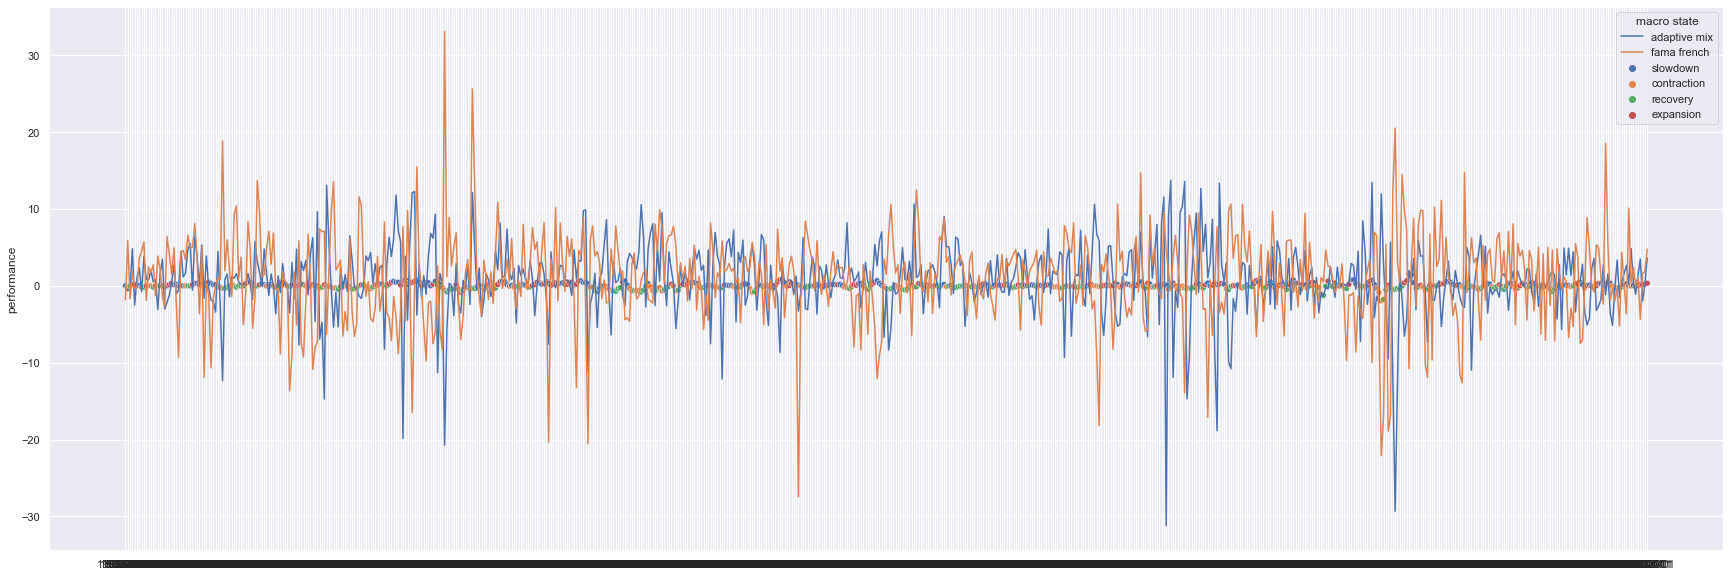

In [41]:
sns.set(rc={'figure.figsize':(30,10)})

sns.lineplot(x = list(summary.index.astype('str')), y='performance', data = summary, label = 'adaptive mix')
#sns.lineplot(x = list(fama_french.loc[:'2018-05-01'].index.astype('str')), y = fama_french['Mkt-RF'].loc[:'2018-05-01'], data = fama_french.loc[:'2018-05-01'], label = 'fama french')
sns.lineplot(x = list(fama_french.loc['1963-07-01':'2018-05-01'].index.astype('str')), y = fama_french_.loc['1963-07-01':'2018-05-01'], data = fama_french_.loc['1963-07-01':'2018-05-01'], label = 'fama french')
#sns.lineplot(x = list(value_HML.index.astype('str')), y = 'mean', data = value_HML, label = 'value')

sns.scatterplot(x = list(summary.index.astype('str')), y='gradient', hue='macro state', data = summary)

<p><u>Findings</u></p>
<p>We find that by adapting to the economic states instead of relying on assumptions of the factors for each state, we find equal performance to the Fama French 3 factor model</p>

____

<p><b><u>Part 3</u></b> - a revisitation to part 1</p>
<p>We shall bring over the double adaptive mechanism (factors dependent on economic state & each economic state having different combinations of 3 of the total 6 factors，dependent on time period) from part 2, back to part 1 and test the performance for the past 3 years</p>

In [42]:
economic_cycle = pd.concat([economic_cycle, value_HML['value'], Size, yield_HML['yield'], HML_Momentum['momentum'],
           HML_Profitability['quality'], HML_Volatility['volatility']], axis = 1)
economic_cycle

,United States of America - CPI (Y-o-Y %) (Monthly),gradient,rate of change,gradient +/-,rate of change +/-,macro state,performance,value,size,yield,momentum,quality,volatility
2018-05-01,2.801012,0.070536,0.003715,positive,positive,expansion,2.472200,-2.404000,1.076200,-0.6400,3.800,-2.01215,0.460254
2018-06-01,2.871548,0.074251,-0.078360,positive,negative,slowdown,-1.801239,-1.037300,2.158267,0.1325,-2.380,0.82645,-0.247689
2018-07-01,2.949515,-0.086184,-0.205261,negative,negative,contraction,2.604103,0.131550,-1.631533,0.1175,-1.670,1.53395,0.938603
2018-08-01,2.699180,-0.336271,-0.001085,negative,negative,contraction,-3.263176,-3.478650,0.224800,-2.2550,5.225,-0.14645,0.361924
2018-09-01,2.276972,-0.088355,0.143043,negative,positive,recovery,-0.507692,-1.021825,1.041633,-0.5275,-0.050,0.58660,0.226367
2018-10-01,2.522470,-0.050186,-0.108900,negative,negative,contraction,4.357062,3.544650,-1.733533,4.0825,-1.840,0.91105,-0.098638
2018-11-01,2.176601,-0.306156,-0.131249,negative,negative,contraction,-1.091924,-0.440075,-0.623833,0.3475,-1.325,-0.63385,-0.017999
2018-12-01,1.910159,-0.312683,0.055572,negative,positive,recovery,1.114483,-1.663250,2.742733,0.0350,1.850,-0.08780,-0.104339
2019-01-01,1.551235,-0.195012,0.234163,negative,positive,recovery,-0.720300,0.342300,-0.452600,-0.6100,-8.650,-0.64965,0.251412
2019-02-01,1.520135,0.155644,0.216582,positive,positive,expansion,-1.821067,-2.429800,-0.251267,-1.8125,0.860,0.08800,0.015793


In [43]:
def factor_identifier1(date):
    x = list(pd.DataFrame(economic_cycle[['value', 'size', 'yield', 'momentum', 'volatility']].T[date].sort_values(ascending=False).head(3)).index)
    return x

In [44]:
economic_cycle = pd.concat([economic_cycle, pd.DataFrame([factor_identifier1(i) for i in list(economic_cycle.index.astype('str'))],
                                 columns = ['Factor 1', 'Factor 2', 'Factor 3'], 
                                 index = list(economic_cycle.index.astype('str')))], axis = 1)
economic_cycle

,United States of America - CPI (Y-o-Y %) (Monthly),gradient,rate of change,gradient +/-,rate of change +/-,macro state,performance,value,size,yield,momentum,quality,volatility,Factor 1,Factor 2,Factor 3
2018-05-01,2.801012,0.070536,0.003715,positive,positive,expansion,2.472200,-2.404000,1.076200,-0.6400,3.800,-2.01215,0.460254,momentum,size,volatility
2018-06-01,2.871548,0.074251,-0.078360,positive,negative,slowdown,-1.801239,-1.037300,2.158267,0.1325,-2.380,0.82645,-0.247689,size,yield,volatility
2018-07-01,2.949515,-0.086184,-0.205261,negative,negative,contraction,2.604103,0.131550,-1.631533,0.1175,-1.670,1.53395,0.938603,volatility,value,yield
2018-08-01,2.699180,-0.336271,-0.001085,negative,negative,contraction,-3.263176,-3.478650,0.224800,-2.2550,5.225,-0.14645,0.361924,momentum,volatility,size
2018-09-01,2.276972,-0.088355,0.143043,negative,positive,recovery,-0.507692,-1.021825,1.041633,-0.5275,-0.050,0.58660,0.226367,size,volatility,momentum
2018-10-01,2.522470,-0.050186,-0.108900,negative,negative,contraction,4.357062,3.544650,-1.733533,4.0825,-1.840,0.91105,-0.098638,yield,value,volatility
2018-11-01,2.176601,-0.306156,-0.131249,negative,negative,contraction,-1.091924,-0.440075,-0.623833,0.3475,-1.325,-0.63385,-0.017999,yield,volatility,value
2018-12-01,1.910159,-0.312683,0.055572,negative,positive,recovery,1.114483,-1.663250,2.742733,0.0350,1.850,-0.08780,-0.104339,size,momentum,yield
2019-01-01,1.551235,-0.195012,0.234163,negative,positive,recovery,-0.720300,0.342300,-0.452600,-0.6100,-8.650,-0.64965,0.251412,value,volatility,size
2019-02-01,1.520135,0.155644,0.216582,positive,positive,expansion,-1.821067,-2.429800,-0.251267,-1.8125,0.860,0.08800,0.015793,momentum,volatility,size


In [45]:
economic_cycle.groupby('macro state')[['Factor 1', 'Factor 2', 'Factor 3']].agg(pd.Series.mode)

,Factor 1,Factor 2,Factor 3
macro state,,,
contraction,momentum,volatility,volatility
expansion,momentum,yield,volatility
recovery,size,"[value, volatility]","[size, yield]"
slowdown,"[momentum, size]",size,volatility


In [46]:
def Factor_mapper_revised(date):

    if economic_cycle.loc[date][5] == 'recovery':
        return yield_HML.loc[date][-1] + Size.loc[date][-1] + HML_Volatility.loc[date][-1]
    
    elif economic_cycle.loc[date][5] == 'expansion':
        return HML_Momentum.loc[date][-1] + yield_HML.loc[date][-1] + HML_Volatility.loc[date][-1]
    
    elif economic_cycle.loc[date][5] == 'slowdown':
        return HML_Momentum.loc[date][-1] + Size.loc[date][-1] + HML_Volatility.loc[date][-1]
    
    elif economic_cycle.loc[date][5] == 'contraction':
        return HML_Momentum.loc[date][-1] + HML_Volatility.loc[date][-1] + HML_Volatility.loc[date][-1]
    else:
        pass

In [47]:
economic_cycle['revised performance'] = [Factor_mapper_revised(i) for i in list(economic_cycle.index.astype('str'))]
economic_cycle

,United States of America - CPI (Y-o-Y %) (Monthly),gradient,rate of change,gradient +/-,rate of change +/-,macro state,performance,value,size,yield,momentum,quality,volatility,Factor 1,Factor 2,Factor 3,revised performance
2018-05-01,2.801012,0.070536,0.003715,positive,positive,expansion,2.472200,-2.404000,1.076200,-0.6400,3.800,-2.01215,0.460254,momentum,size,volatility,3.620254
2018-06-01,2.871548,0.074251,-0.078360,positive,negative,slowdown,-1.801239,-1.037300,2.158267,0.1325,-2.380,0.82645,-0.247689,size,yield,volatility,-0.469423
2018-07-01,2.949515,-0.086184,-0.205261,negative,negative,contraction,2.604103,0.131550,-1.631533,0.1175,-1.670,1.53395,0.938603,volatility,value,yield,0.207207
2018-08-01,2.699180,-0.336271,-0.001085,negative,negative,contraction,-3.263176,-3.478650,0.224800,-2.2550,5.225,-0.14645,0.361924,momentum,volatility,size,5.948847
2018-09-01,2.276972,-0.088355,0.143043,negative,positive,recovery,-0.507692,-1.021825,1.041633,-0.5275,-0.050,0.58660,0.226367,size,volatility,momentum,0.740500
2018-10-01,2.522470,-0.050186,-0.108900,negative,negative,contraction,4.357062,3.544650,-1.733533,4.0825,-1.840,0.91105,-0.098638,yield,value,volatility,-2.037277
2018-11-01,2.176601,-0.306156,-0.131249,negative,negative,contraction,-1.091924,-0.440075,-0.623833,0.3475,-1.325,-0.63385,-0.017999,yield,volatility,value,-1.360998
2018-12-01,1.910159,-0.312683,0.055572,negative,positive,recovery,1.114483,-1.663250,2.742733,0.0350,1.850,-0.08780,-0.104339,size,momentum,yield,2.673394
2019-01-01,1.551235,-0.195012,0.234163,negative,positive,recovery,-0.720300,0.342300,-0.452600,-0.6100,-8.650,-0.64965,0.251412,value,volatility,size,-0.811188
2019-02-01,1.520135,0.155644,0.216582,positive,positive,expansion,-1.821067,-2.429800,-0.251267,-1.8125,0.860,0.08800,0.015793,momentum,volatility,size,-0.936707


<AxesSubplot:ylabel='revised performance'>

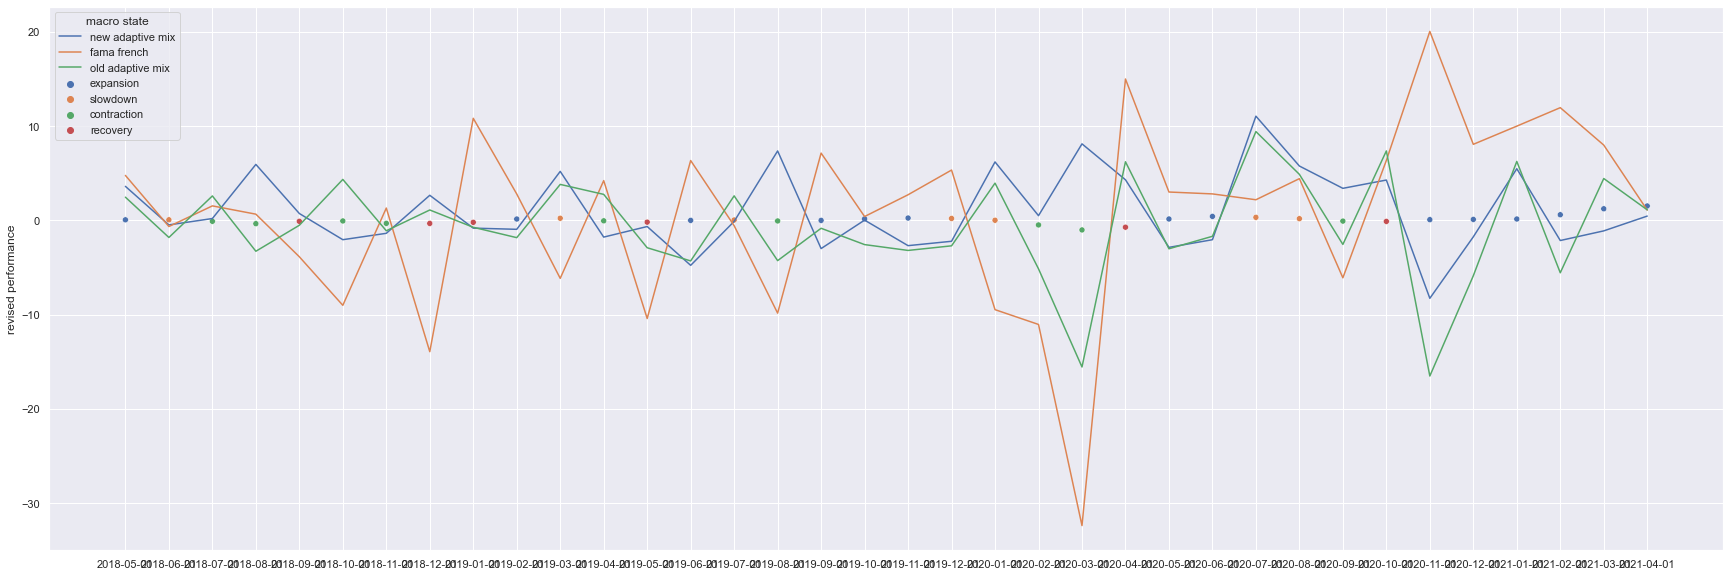

In [48]:
sns.set(rc={'figure.figsize':(30,10)})

sns.lineplot(x = list(economic_cycle.index.astype('str')), y='revised performance', data = economic_cycle, label = 'new adaptive mix')
sns.lineplot(x = list(fama_french.loc['2018-05-01':].index.astype('str')), y = fama_french_.loc['2018-05-01':], data = fama_french_.loc['2018-05-01':], label = 'fama french')
sns.lineplot(x = list(economic_cycle.index.astype('str')), y='performance', data = economic_cycle, label = 'old adaptive mix')
#sns.lineplot(x = list(value_HML.index.astype('str')), y = 'mean', data = value_HML, label = 'value')

sns.scatterplot(x = list(economic_cycle.index.astype('str')), y='gradient', hue='macro state', data = economic_cycle)

In [58]:
print('new adaptive mix: ' + str(economic_cycle['revised performance'].mean()))
print('old adaptive mix: ' + str(economic_cycle['performance'].mean()))
print('fama-french: ' + str(fama_french_.loc['2018-05-01':].mean()))
print('Average outperformance % (new-adaptive v FF3):' + str(100*((economic_cycle['revised performance'].mean()/fama_french_.loc['2018-05-01':].mean())-1)))

new adaptive mix: 1.0181716573124957
old adaptive mix: -0.6164869490104632
fama-french: 0.7783333333333329
Average outperformance % (new-adaptive v FF3):30.814345693254342


<p><u>Conclusion</u></p>
<p>We see that the New adaptive mix (double adaptive mecahnisms) have outperformed the Fama French model ($\approx$31 % outperformance)</p>
Notably, the advantage of the new adaptive portfolio has, stems from its resilience against economic contractions (green dots). The New adaptive mix (with double adaptive mechanism) also shows lower volatility over Fama French 3-factor and the Old adaptive mix(singe adaptive mechanism). The most impressive performance of the New adaptive mix, is during the peak of the covid-19 outbreak (March 2020) - where the economy has tanked, the New adaptive mix produced substaintial gain whilst the FF3 model and Old adaptive mix suffered tremendous losses. </p>